# <font color=darkred>Laboratory 19: We See Errors, We Measure Errors! </font>

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-EH6HD63
desktop-eh6hd63\farha
C:\Users\Farha\Anaconda3\python.exe
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


## Full name: 
## R#: 
## Title of the notebook
## Date: 

![](https://media4.giphy.com/media/3o6ZsXWwgTWagYMikw/giphy.gif) <br>


#### Last time, we talked about linear regression ... <br>

![](https://memegenerator.net/img/instances/73698591.jpg) <br>


- __What is linear regression?__<br>
    a basic predictive analytics technique that uses historical data to predict an output variable.<br>
- __Why do we need linear regression?__
    To explore the relationship between predictor and output variables and predict the output variable based on known values of predictors.  <br>    
- __How does linear regression work?__
    To estimate Y using linear regression, we assume the equation:  𝑌𝑒=β𝑋+α <br>
    Our goal is to find statistically significant values of the parameters α and β that minimise the difference between Y and Yₑ. If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of Y, given the value of X. <br>
- __How to estimate the coefficients?__
    We used a method called "Ordinary Least Squares (OLS)". __But that is not the only way. Let's put a pin on that!__

![](https://media3.giphy.com/media/15bf6pru8mSR2/giphy.gif) <br>


#### Remember when we discussed Probability Density Function (PDF) for the normal distribution? - Probably not!<br>

![](https://miro.medium.com/max/572/1*P78bMZPhhKnzLkwcNgeJ0g.png) <br>


#### This equation is telling us the probability our sample x from our random variable X, when the true parameters of the distribution are μ and σ. <br>


### Example1 :Let’s say our sample is 3, what is the probability it comes from a distribution of μ = 3 and σ = 1? What if it came from a distribution with μ = 7 and σ = 2? Which one is more probable?<br>

In [2]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats
from matplotlib import pyplot as plt

In [2]:
scipy.stats.norm.pdf(3, 3, 1)

0.3989422804014327

In [3]:
scipy.stats.norm.pdf(3, 7, 2)

0.02699548325659403

#### So it is much more likely it came from the first distribution. The PDF equation has shown us how likely those values are to appear in a distribution with certain parameters. Keep that in mind for later. But what if we had a bunch of points we wanted to estimate?
#### Let’s assume we get a bunch of samples fromX which we know to come from some normal distribution, and all are mutually independent from each other. If this is the case, the total probability of observing all of the data is the product of obtaining each data point individually. 
#### This should kinda remind you of our class on probability, where we talked about the probability of multiple events happening back to back (e.g., the royal flush set). 

### Example2 : What is the probability of 2 and 6 being drawn from a distribution with μ = 4 and σ = 1<br>

In [4]:
scipy.stats.norm.pdf(2, 4, 1) * scipy.stats.norm.pdf(6, 4, 1)

0.0029150244650281948

#### Maximum Likelihood Estimation (MLE) is used to specify a distribution of unknown parameters, then using your data to pull out the actual parameter values.To go back to the pin!, let's look at our linear model:
![](https://miro.medium.com/max/352/1*iJrwssQh4dJARzeuQPw1kw.png) <br>
#### The noise parameter (error) is basically why the points (samples) do not fall exactly on the line. The error for each point would be the distance from the point to our line. We’d like to explicitly include those errors in our model. One method of doing this, is to assume the errors are distributed from a Gaussian distribution with a mean of 0 and some unknown variance σ². The Gaussian seems like a good choice, because our errors look like they’re symmetric about were the line would be, and that small errors are more likely than large errors. <br>
#### This model has three parameters: the slope and intercept of our line and the variance of the noise distribution. Our main goal is to find the best parameters for the slope and intercept of our line.
#### let’s rewrite our model from above as a single conditional distribution given x:
![](https://miro.medium.com/max/403/1*S9Wo7Ay3O-CGarsNULSWOA.png) <br>
#### This is equivalent to pushing our x through the equation of the line and then adding noise from the 0 mean Gaussian. Now, we can write the conditional distribution of y given x in terms of this Gaussian. This is just the equation of a Gaussian distribution’s probability density function, with our linear equation in place of the mean:
![](https://miro.medium.com/max/576/1*3M7mJamXgcFPXzvD0U4yIA.png) <br>
#### The semicolon in the conditional distribution acts just like a comma, but it’s a useful notation for separating our observed data from the parameters. <br>
#### Each point is independent and identically distributed (iid), so we can write the likelihood function with respect to all of our observed points as the product of each individual probability density. Since σ² is the same for each data point, we can factor out the term of the Gaussian which doesn’t include x or y from the product:
![](https://miro.medium.com/max/576/1*JXtvd6fO6ydgAqQR4jAaWQ.png) <br>
#### The next step in MLE, is to find the parameters which maximize this function. To make our equation simpler, let’s take the log of our likelihood. Recall, that maximizing the log-likelihood is the same as maximizing the likelihood since the log is monotonic. The natural log cancels out with the exponential, turns products into sums of logs, and division into subtraction of logs; so our log-likelihood looks much simpler:
![](https://miro.medium.com/max/576/1*gDNxsKgiWTj6AWmolmkjlQ.png) <br>
#### To clean things up a bit more, let’s write the output of our line as a single value:
![](https://miro.medium.com/max/226/1*tCAZf5pWI5UYyWLXiZ-tSw.png) <br>
#### Now our log-likelihood can be written as::
![](https://miro.medium.com/max/576/1*U8yya-GV548dLYdRVabERQ.png) <br>
#### To remove the negative signs, let’s recall that maximizing a number is the same thing as minimizing the negative of the number. So instead of maximizing the likelihood, let’s minimize the negative log-likelihood:
![](https://miro.medium.com/max/576/1*Y_B6FPJq0jb17qK04MVltw.png) <br>
#### Our ultimate goal is to find the parameters of our line. To minimize the negative log-likelihood with respect to the linear parameters (the θs), we can imagine that our variance term is a fixed constant. Removing any constant’s which don’t include our θs won’t alter the solution. Therefore, we can throw out any constant terms and elegantly write what we’re trying to minimize as:
![](https://miro.medium.com/max/175/1*O8b2CNiqn3xjUF3fkklrXQ.png) <br>
#### The maximum likelihood estimate for our linear model is the line which minimizes the sum of squared errors!
![](https://media1.giphy.com/media/SJX3gbZ2dbaEhU92Pu/source.gif) <br>
#### Now, let's solve for parameters. We’ve concluded that the maximum likelihood estimates for our slope and intercept can be found by minimizing the sum of squared errors. Let’s expand out our minimization objective and use i as our index over our n data points:
![](https://miro.medium.com/max/403/1*0zO8-m3ZdruX0hgJ4zLm9g.png) <br>
#### The square in the SSE formula makes it quadratic with a single minimum. The minimum can be found by taking the derivative with respect to each of the parameters, setting it equal to 0, and solving for the parameters in turn. <br>

#### Taking the partial derivative with respect to the intercept, Setting the derivative equal to 0 and solving for the intercept gives us:
![](https://miro.medium.com/max/227/1*YzIf9e2kTWbjgx58wb-KXw.png) <br>
#### Taking the partial derivative with respect to the slope, Setting the derivative equal to 0 and solving for the slope gives us:
![](https://miro.medium.com/max/324/1*o0vOZ25b1h57UyidKsJlvQ.png) <br>
#### And now it's time to put it all together:


In [5]:
def find_line(xs, ys):
    """Calculates the slope and intercept"""
    
    # number of points
    n = len(xs)
    # calculate means
    x_bar = sum(xs)/n
    y_bar = sum(ys)/n
        
    # calculate slope
    num = 0
    denom = 0
    for i in range(n):
        num += (xs[i]-x_bar)*(ys[i]-y_bar)
        denom += (xs[i]-x_bar)**2
    slope = num/denom
    
    # calculate intercept
    intercept = y_bar - slope*x_bar
    
    return slope, intercept

### Example 3: Let's have a look at the familiar problem  from Exam II which was also an Example in the previous lab!<br>

#### We had a table of recorded times and speeds from some experimental observations. Use MLE to find the intercept and the slope:

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7|
|3.0 |12|
|4.0 |20|
|5.0 |30|
|6.0 | 45.6| 
|7.0 | 60.3 |
|8.0 | 77.7 |
|9.0 | 97.3 |
|10.0| 121.1|

In [6]:
time = [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
speed = [0, 3, 7, 12, 20, 30, 45.6, 60.3, 77.7, 97.3, 121.2]
find_line(time, speed) #Is this similar to our past results?! 

(11.977272727272727, -16.78636363636364)

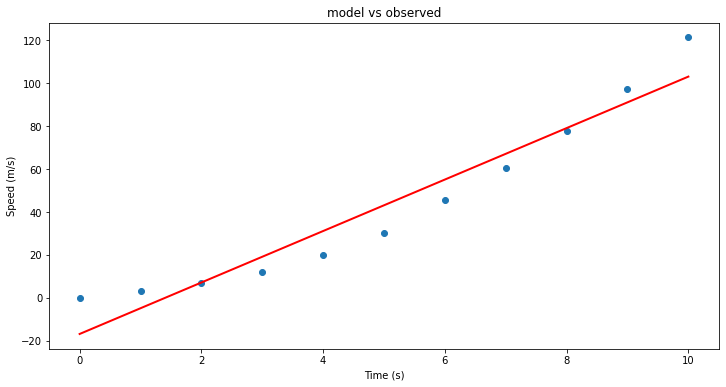

In [7]:
# Predict values
X = np.array(time)
alpha = -16.78636363636364
beta = 11.977272727272727
ypred = alpha + beta * X


# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, speed, 'o')           # scatter plot showing actual data
plt.plot(X, ypred, 'r', linewidth=2)   # regression line
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('model vs observed')

plt.show()

## Goodness-of-Fit <br>
### So far, we have assessed the quality of fits visually. We can make numerical assessments as well via Goodness-of-Fit (GOF) measures. Let's discuss three of the most common metrics for evaluating predictions on regression machine learning problems: <br>
### Mean Absolute Error (MAE): <br>
    The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting). Here is the formula:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded) <br>

    It is thus an arithmetic average of the absolute errors |ei|=|yi-xi|, where yi is the prediction and xi the true value.  This is known as a scale-dependent accuracy measure and therefore cannot be used to make comparisons between series using different scales.

In [8]:
# calculate manually
d = speed - ypred
mae_m = np.mean(abs(d))


print("Results by manual calculation:")
print("MAE:",mae_m)



import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(speed, ypred)
print(mae)

Results by manual calculation:
MAE: 8.927272727272728
8.927272727272728


### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): <br>
    The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. It measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better. An MSE of zero, meaning that the estimator predicts observations of the parameter with perfect accuracy, is ideal (but typically not possible).Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE). RMSE is the most widely used metric for regression tasksHere is the formula:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e) <br>


In [9]:
mse_m = np.mean(d**2)
rmse_m = np.sqrt(mse_m)
print("MSE:", mse_m)
print("RMSE:", rmse_m)
mse = metrics.mean_squared_error(speed, ypred)
rmse = np.sqrt(mse) # or mse**(0.5) 
print(mse)
print(rmse)

MSE: 108.88210743801659
RMSE: 10.434658951686758
108.88210743801659
10.434658951686758


### R^2 Metric: <br>
    The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model..Here is the formula:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3a1f55d7e84c24299917fb3fec4d0439b81e728d) <br>
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2669c9340581d55b274d3b8ea67a7deb2225510b) <br>
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/c7e3ab84636f38c257641f85f009bcb422c73151) <br>

In [10]:
r2_m = 1-(sum(d**2)/sum((speed-np.mean(speed))**2))
print("R-Squared:", r2_m)
r2 = metrics.r2_score(speed, ypred)
print(r2)

R-Squared: 0.9294545816516323
0.9294545816516323


![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*This notebook was inspired by several blogposts including:* 
- __"What is Maximum Likelihood Estimation — Examples in Python"__ by __Robert R.F. DeFilippi__ available at* https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030 <br>
- __"Linear Regression"__ by __William Fleshman__  available at* https://towardsdatascience.com/linear-regression-91eeae7d6a2e <br>
- __"Regression Accuracy Check in Python (MAE, MSE, RMSE, R-Squared)"__ available at* https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html <br>

*Here are some great reads on these topics:* 
- __"A Gentle Introduction to Linear Regression With Maximum Likelihood Estimation"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/ <br>
- __"Metrics To Evaluate Machine Learning Algorithms in Python"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/ <br>
- __"A Gentle Introduction to Maximum Likelihood Estimation"__ by __Jonathan Balaban__ available at* https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f <br>
- __"Regression: An Explanation of Regression Metrics And What Can Go Wrong"__ by __Divyanshu Mishra__ available at* https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914 <br>
- __"Tutorial: Understanding Regression Error Metrics in Python"__ available at* https://www.dataquest.io/blog/understanding-regression-error-metrics/ <br>

*Here are some great videos on these topics:* 
- __"StatQuest: Maximum Likelihood, clearly explained!!!"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=XepXtl9YKwc <br>
- __"Maximum Likelihood for Regression Coefficients (part 1 of 3)" and part 2 and 3__ by __Professor Knudson__ available at* https://www.youtube.com/watch?v=avs4V7wBRw0 <br>
- __"StatQuest: R-squared explained"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=2AQKmw14mHM <br>

___
![](https://media2.giphy.com/media/dNgK7Ws7y176U/200.gif) <br>


## Exercise: Which Metric to Pick? <br>

### - What are the similarities between MAE and RMSE?
### - What are the differences between MAE and RMSE?
### - Do you think it is better to stick with one GOF metric or to use multiple metrics? why?

#### _Make sure to cite any resources that you may use._ 

![](https://www.birthdaywishes.expert/wp-content/uploads/2018/01/Sigmund-Freud-quote-about-truth.jpg)